# PRJNA865728 Tryndyak et al.

Article link: [Tryndyak](https://www.nature.com/articles/s41597-025-05100-x).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})

prj <- "PRJNA865728"
lineages_in_paper <- c(
    "BA.1", "BA.2", "BA.4", "BA.5",
    "BQ.1", "BE.1", "JD.1", "EG.5", "EG.8", "HV.1", "JG.1", "HK.3", "JN.1",
    "XCP, XBB, XBB.1", "XBB.2"
)


In [2]:
coco <- read.csv(
    here(
        "data/processed/",
        paste0(prj, "_processed.csv.gz")
    )
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>
1,10527,+10528.T,ins:10528:1,0.0000000,74,0,SRR20800205,2022-01-25,24-PB-wk92trimmed,202,921023010,PRJNA865728,Arkansas,50000
2,11074,+11075.T,ins:11075:1,0.0209205,239,5,SRR20800205,2022-01-25,24-PB-wk92trimmed,202,921023010,PRJNA865728,Arkansas,50000
3,11074,+11075.TT,ins:11075:2,0.0000000,239,0,SRR20800205,2022-01-25,24-PB-wk92trimmed,202,921023010,PRJNA865728,Arkansas,50000
4,11074,+11075.TTT,ins:11075:3,0.0000000,239,0,SRR20800205,2022-01-25,24-PB-wk92trimmed,202,921023010,PRJNA865728,Arkansas,50000
5,11075,+11076.C,ins:11076:1,0.0000000,239,0,SRR20800205,2022-01-25,24-PB-wk92trimmed,202,921023010,PRJNA865728,Arkansas,50000
6,13131,+13132.G,ins:13132:1,0.0000000,1238,0,SRR20800205,2022-01-25,24-PB-wk92trimmed,202,921023010,PRJNA865728,Arkansas,50000


In [3]:
barcodes <- provoc::usher_barcodes()
print("Lineages not in barcodes:")
print(setdiff(lineages_in_paper, rownames(barcodes)))
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1] "Lineages not in barcodes:"
[1] "XCP, XBB, XBB.1"


[1]  14 191

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
179.497   3.110 183.421 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>
1,8.562038e-05,NA,NA,JN.1,SRR20800205,2022-01-25,24-PB-wk92trimmed,202,921023010,PRJNA865728,Arkansas,50000
2,1.713367e-04,NA,NA,HK.3,SRR20800205,2022-01-25,24-PB-wk92trimmed,202,921023010,PRJNA865728,Arkansas,50000
3,8.261064e-12,NA,NA,JG.1,SRR20800205,2022-01-25,24-PB-wk92trimmed,202,921023010,PRJNA865728,Arkansas,50000
4,5.757709e-10,NA,NA,HV.1,SRR20800205,2022-01-25,24-PB-wk92trimmed,202,921023010,PRJNA865728,Arkansas,50000
5,5.479884e-07,NA,NA,EG.5,SRR20800205,2022-01-25,24-PB-wk92trimmed,202,921023010,PRJNA865728,Arkansas,50000
6,3.923525e-05,NA,NA,JD.1,SRR20800205,2022-01-25,24-PB-wk92trimmed,202,921023010,PRJNA865728,Arkansas,50000


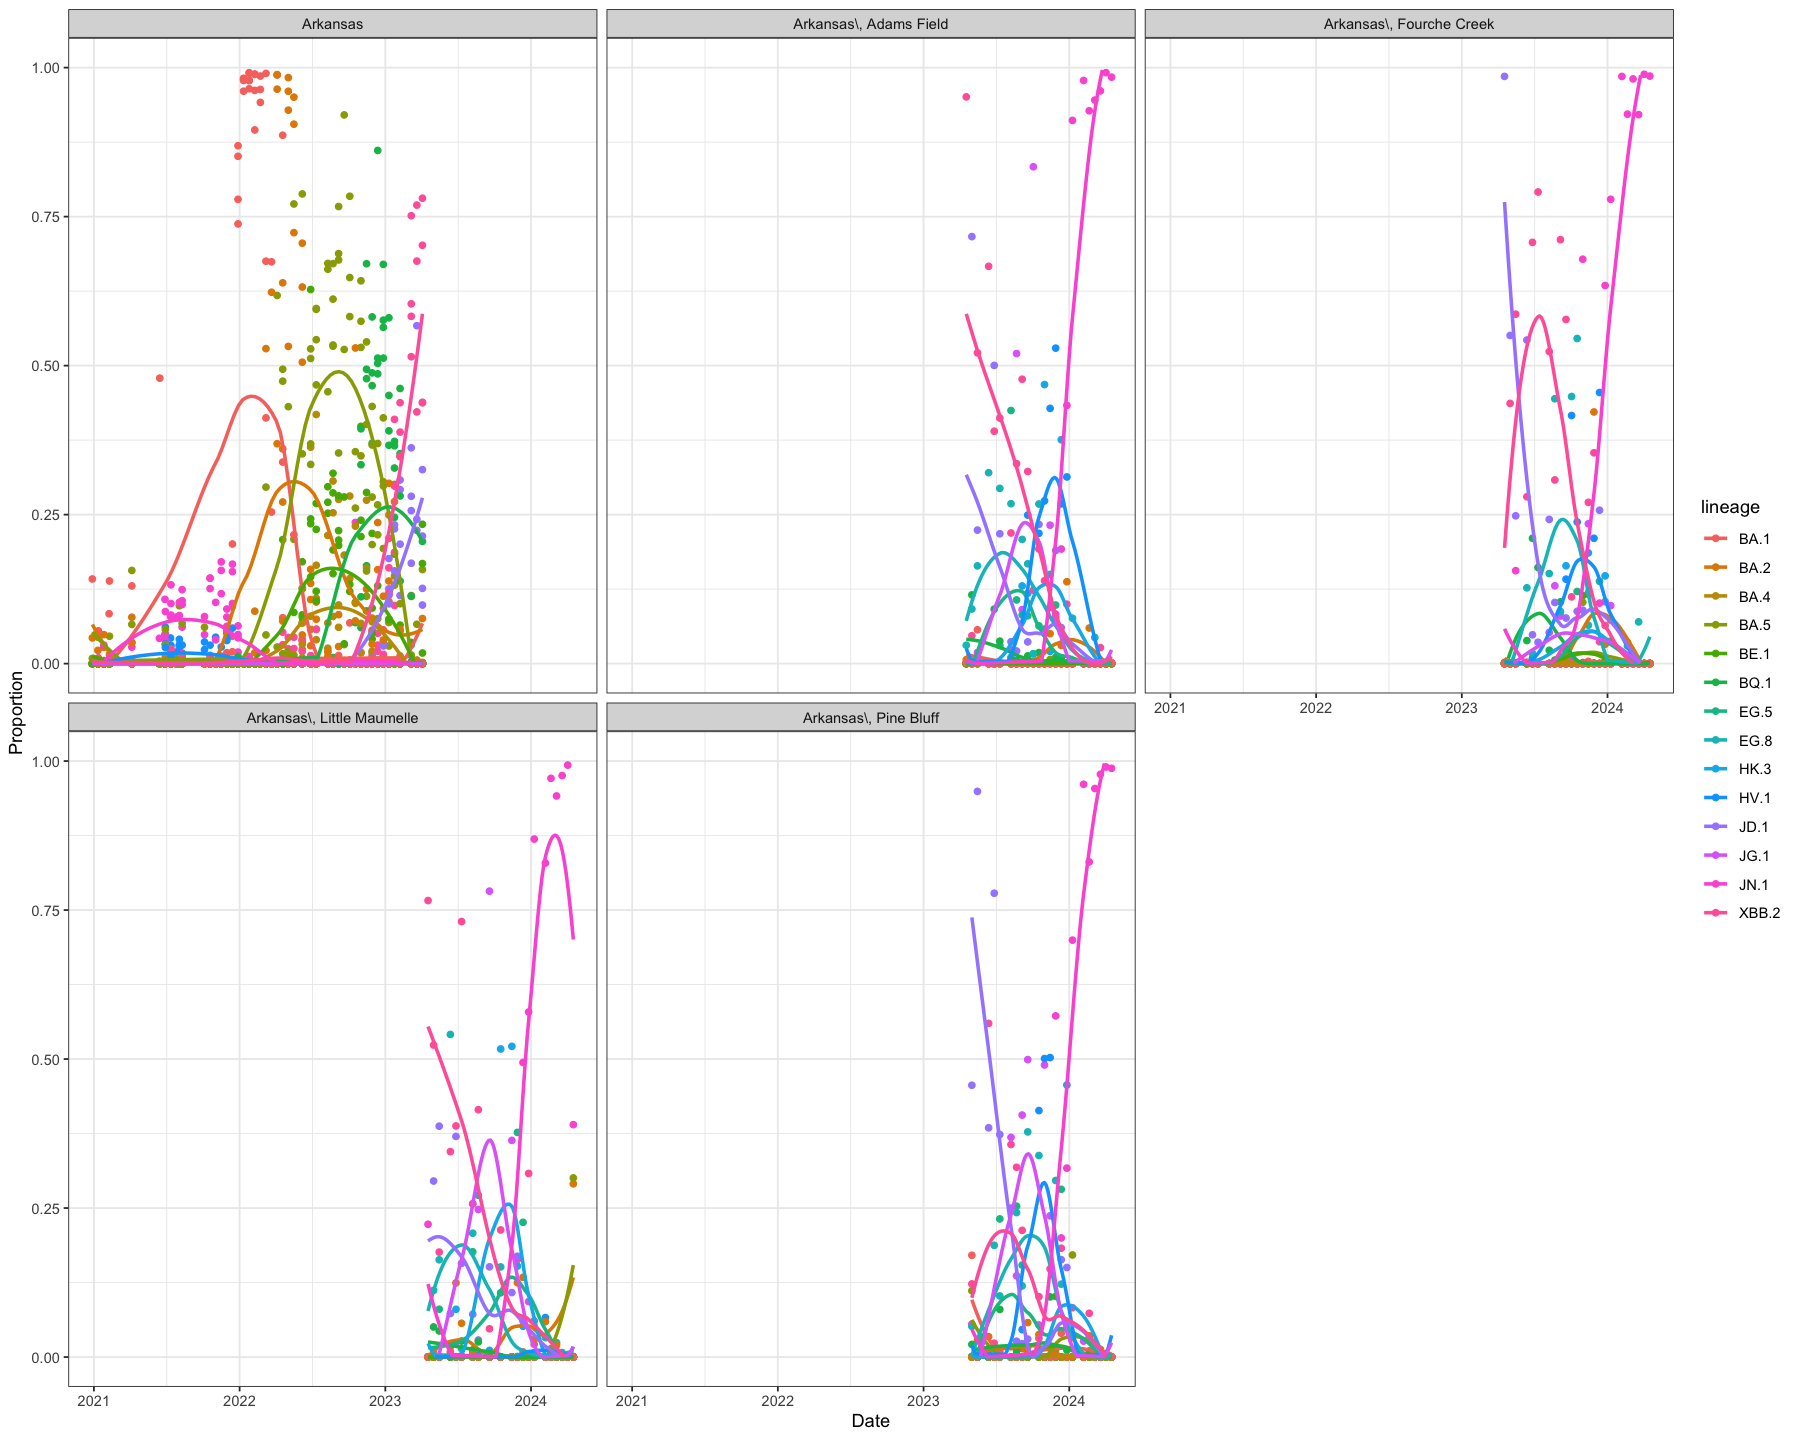

In [11]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
